Dataset
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


Parts of this exploritory data analysis are pulled from work completed in https://www.kaggle.com/code/viveksrinivasan/eda-ensemble-model-top-10-percentile

Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light sbow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, sbow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registere

# Importing Libraries and Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [ ]:
# Connecting Google Drive to load/store datset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing datasets
day = pd.read_csv('/content/drive/MyDrive/day.csv')
hour = pd.read_csv('/content/drive/MyDrive/hour.csv')

In [ ]:
print(day.shape)
day.info()
day.head(3)

(731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [ ]:
print(hour.shape)
hour.info()
hour.head(3)

(17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


Plot the day and hour data

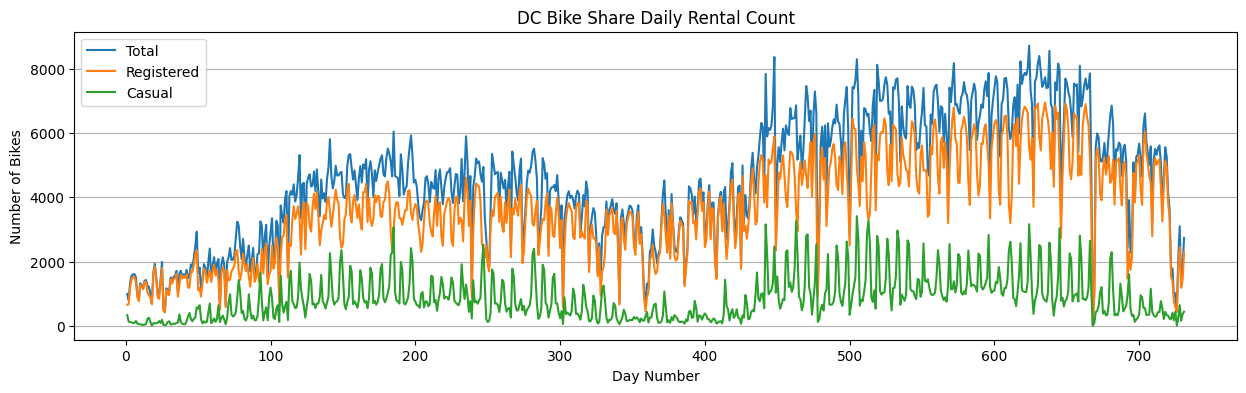

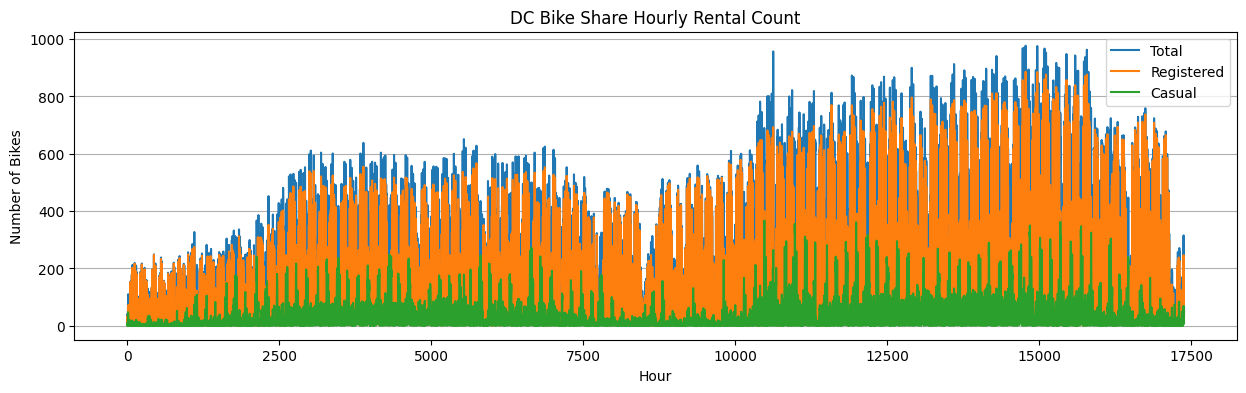

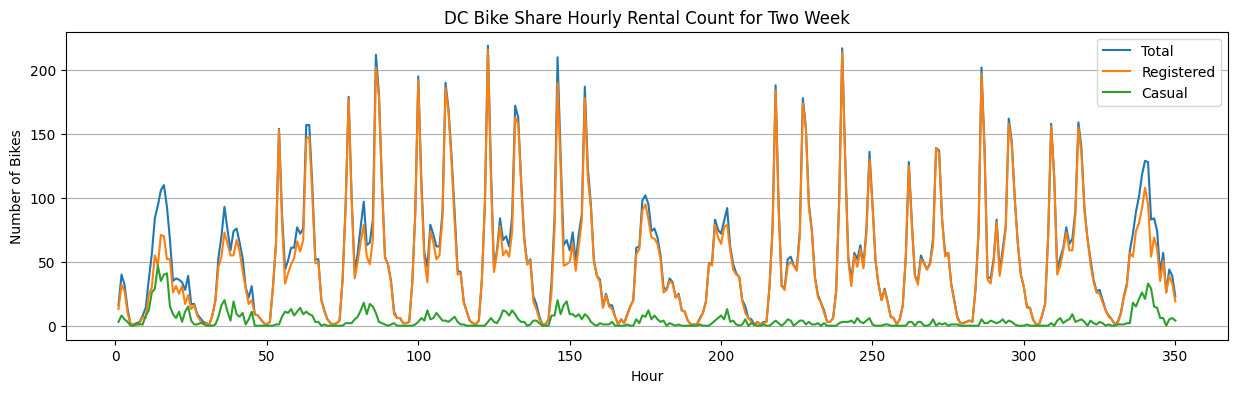

In [ ]:
plt.figure(1, figsize=(15,4))
plt.plot(day.loc[:,'instant'], day.loc[:,'cnt'])
plt.plot(day.loc[:,'instant'], day.loc[:,'registered'])
plt.plot(day.loc[:,'instant'], day.loc[:,'casual'])
plt.title('DC Bike Share Daily Rental Count')
plt.xlabel('Day Number')
plt.ylabel('Number of Bikes')
plt.legend(['Total', 'Registered', 'Casual'])
plt.grid(axis='y')

plt.figure(2, figsize=(15,4))
plt.plot(hour.loc[:,'instant'], hour.loc[:,'cnt'])
plt.plot(hour.loc[:,'instant'], hour.loc[:,'registered'])
plt.plot(hour.loc[:,'instant'], hour.loc[:,'casual'])
plt.title('DC Bike Share Hourly Rental Count')
plt.xlabel('Hour')
plt.ylabel('Number of Bikes')
plt.legend(['Total', 'Registered', 'Casual'])
plt.grid(axis='y')

plt.figure(3, figsize=(15,4))
plt.plot(hour.iloc[0:25*14,0], hour.iloc[0:25*14, 16])
plt.plot(hour.iloc[0:25*14,0], hour.iloc[0:25*14, 15])
plt.plot(hour.iloc[0:25*14,0], hour.iloc[0:25*14, 14])
plt.title('DC Bike Share Hourly Rental Count for Two Week')
plt.xlabel('Hour')
plt.ylabel('Number of Bikes')
plt.legend(['Total', 'Registered', 'Casual'])
plt.grid(axis='y')

Correlation Matrix

<Axes: >

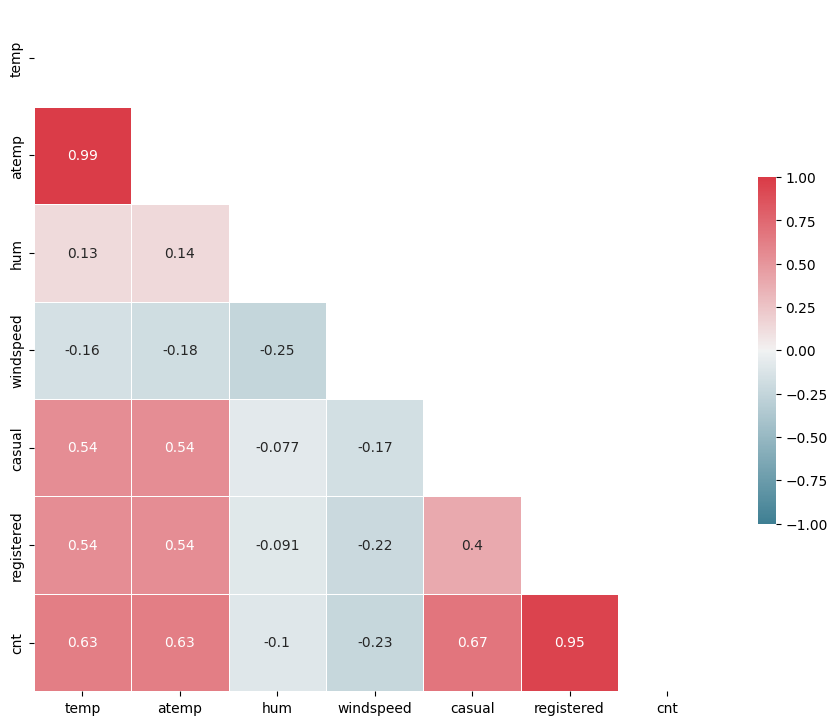

In [ ]:
# Create the correlation matrix ( sourced from https://lost-stats.github.io/Presentation/Figures/heatmap_colored_correlation_matrix.html)
corr = day.iloc[:, 9:16].corr()
# corr = day_data.corr()
# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sb.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=1,       # The maximum value of the legend. All higher vals will be same color
    vmin=-1,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

Autocorrelation and Partial Correlation

<ipython-input-43-cc1f1d74add6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_day['dteday'] = pd.to_datetime(time_series_day['dteday'])


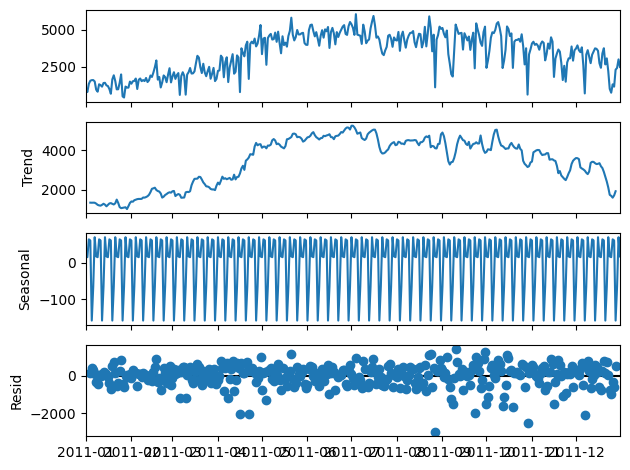

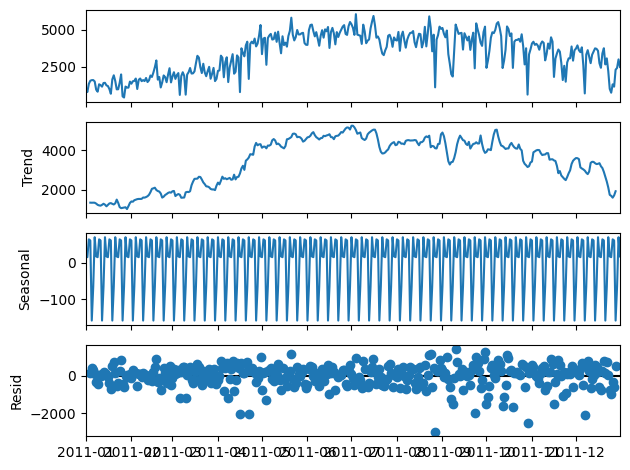

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
time_series_day = day[['dteday','cnt']]
# time_series.head()
# time_series.isbull().sum()

# convert dteday to datetime and then set it as index
time_series_day['dteday'] = pd.to_datetime(time_series_day['dteday'])
time_series_day = time_series_day.set_index('dteday')
time_series_day = time_series_day[0:365]
result = sd(time_series_day, model='additive')
result.plot()

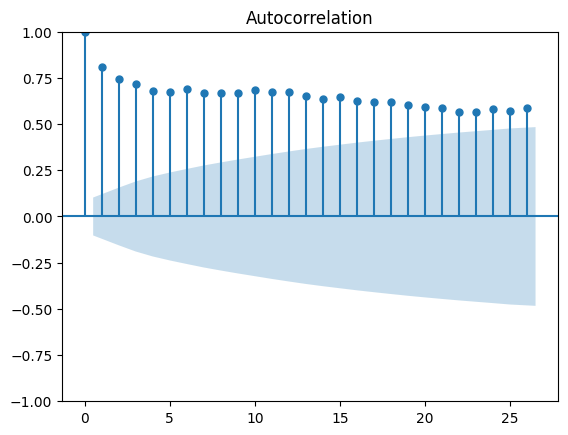

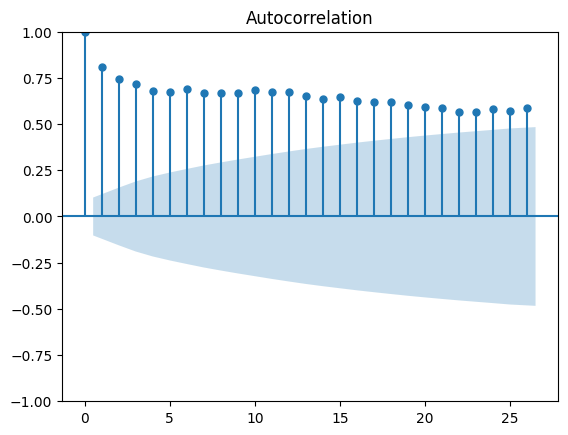

In [ ]:
# Autocorrelation test
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(time_series_day)



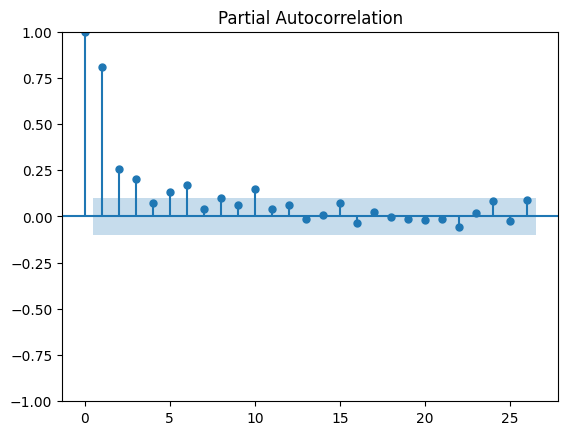

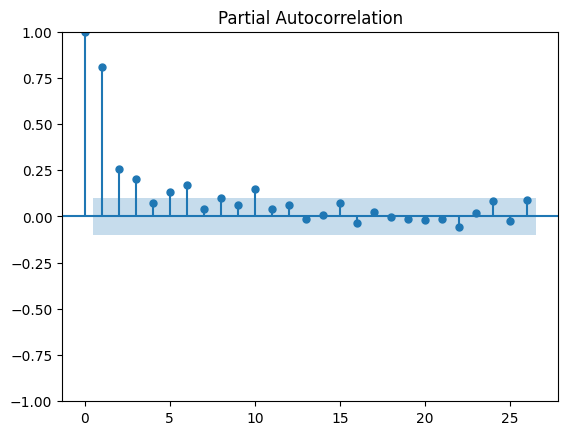

In [ ]:
# Partial autocorrelation test

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(time_series_day)

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

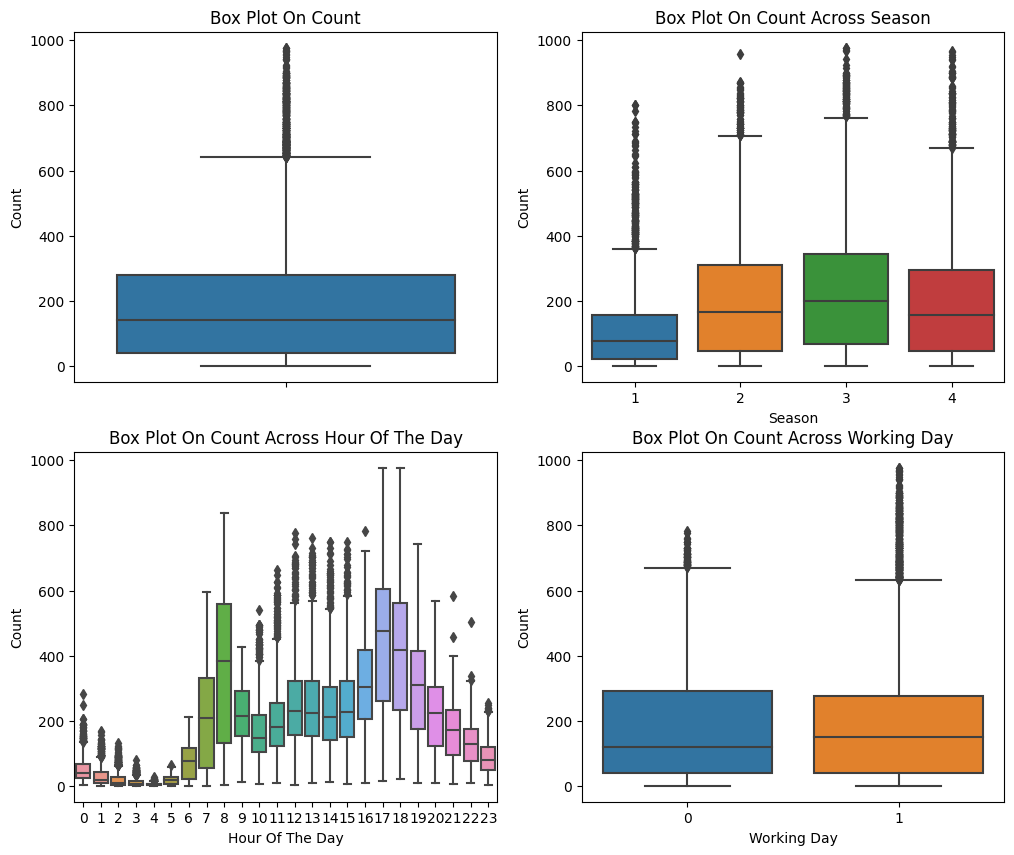

In [ ]:

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sb.boxplot(data=hour,y="cnt",orient="v",ax=axes[0][0])
sb.boxplot(data=hour,y="cnt",x="season",orient="v",ax=axes[0][1])
sb.boxplot(data=hour,y="cnt",x="hr",orient="v",ax=axes[1][0])
sb.boxplot(data=hour,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")


Prep day dataset by pulling out data

In [ ]:
# Add a new column to the DataFrame to store the day of the week as a number
# day['DayNumber'] = day['dteday'].dt.dayofweek
day['dteday'] = pd.to_datetime(day['dteday'])
# Add a new column to the DataFrame to store the abbreviated name of the day of the week
day['DayOfWeek'] = day['dteday'].dt.strftime('%a')

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

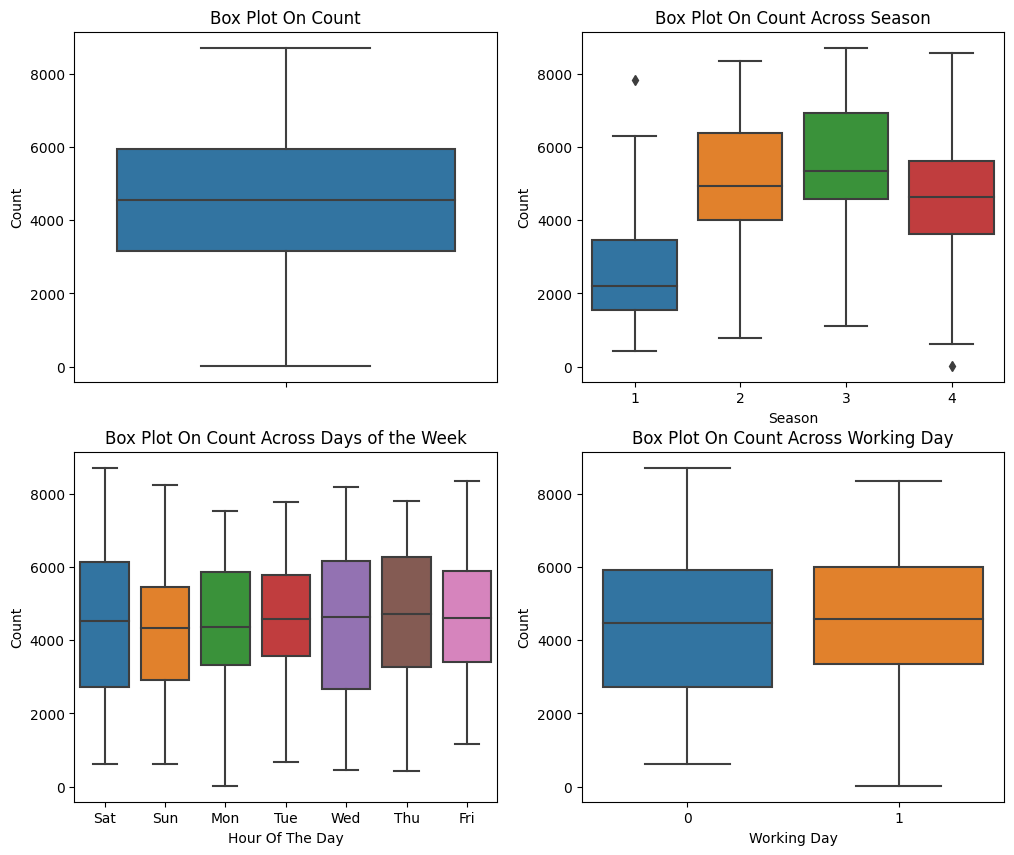

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sb.boxplot(data=day,y="cnt",orient="v",ax=axes[0][0])
sb.boxplot(data=day,y="cnt",x="season",orient="v",ax=axes[0][1])
sb.boxplot(data=day,y="cnt",x="DayOfWeek",orient="v",ax=axes[1][0])
sb.boxplot(data=day,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Days of the Week")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

     hr    weekday         cnt
0     0     Friday   52.432692
1     0     Monday   34.009524
2     0   Saturday   94.304762
3     0     Sunday   93.990385
4     0   Thursday   39.271845
..   ..        ...         ...
163  23   Saturday  115.855769
164  23     Sunday   61.895238
165  23   Thursday   96.750000
166  23    Tuesday   76.173077
167  23  Wednesday   83.737864

[168 rows x 3 columns]


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

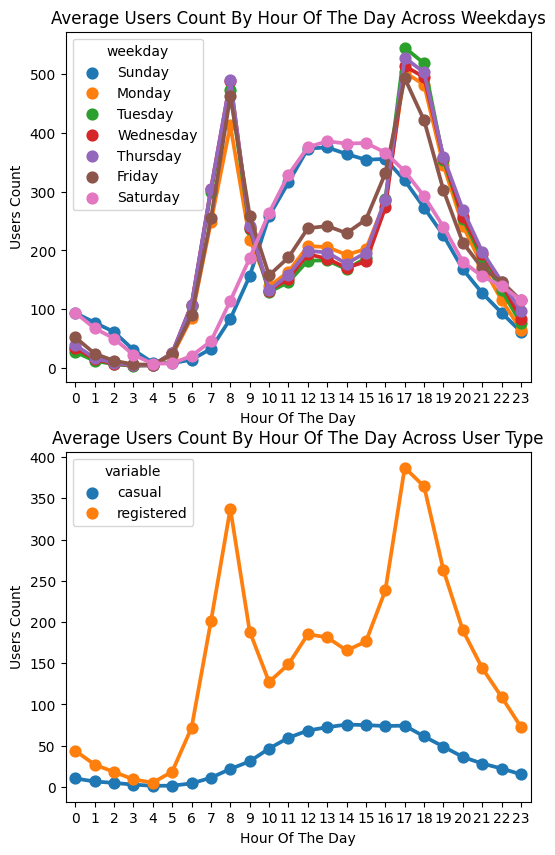

In [ ]:
days = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 0:'Sunday'}
hour['weekday'] = hour['weekday'].map(days)
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(6,10)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday", "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(hour.groupby("mnth")["cnt"].mean()).reset_index()
# print(monthAggregated)
monthSorted = monthAggregated.sort_values(by="mnth",ascending=True)
# print(monthSorted)
# sb.barplot(data=monthSorted,x="mnth",y="cnt", ax=ax1)
# ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(hour.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()

# sb.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
# ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(hour.groupby(["hr","weekday"],sort=True)["cnt"].mean()).reset_index()
print(hourAggregated)
sb.pointplot(x=hourAggregated["hr"],
             y=hourAggregated["cnt"],
             hue=hourAggregated["weekday"],
             hue_order=hueOrder,
             data=hourAggregated,
             join=True,
             ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(hour[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()

sb.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

